In [1]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context('paper')

# Potential of a single compartiment neuron

In [2]:
with open('../data4/v4_batch0/v4_batch0_data.pkl', 'rb') as file_pkl:
    single_neuron = pickle.load(file_pkl)


In [3]:
def plotPotential(data, ti = 0, tf = -1, cell=0, save=False):
    ti = int(ti/0.1) # to convert em ms
    if tf != -1: tf = int(tf/0.1) # to convert em ms
    #------------------------------------------------------------------------------
    # Set arrays
    #------------------------------------------------------------------------------
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    
    voltage = np.array(list(data['simData']['V_soma'].values())[cell])[ti:tf]
    time = np.array(data['simData']['t'])[ti:tf]
    #stim_current = np.array([0 if x < start/recordStep or x > (dur+start)/recordStep else amp for x in range(0, len(time))])
    # dur = data['simConfig']['IClamp0']['dur']
    # start = data['simConfig']['IClamp0']['start']
    # recordStep = data['simConfig']['recordStep']

    stim_current = np.array([float(amp) for t in time])
    #------------------------------------------------------------------------------
    # Plot figure
    #------------------------------------------------------------------------------
    f, (ax0, ax1) = plt.subplots(2,1, figsize=(10,3), gridspec_kw = {'height_ratios':[3, 1]})
    title = 'Voltage in time of a single neuron sPY'
    f.suptitle(title)
    sns.lineplot(x = time, y =voltage, color='black', ax=ax0)
    ax1.plot(time, stim_current, 'gray')

    ax0.set_ylabel('Voltage (mV)')
    ax0.set_ylim([-76, 55])  
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.get_xaxis().set_visible(False)

    ax1.vlines(x=time[0]+0.05, ymin=0, ymax=amp, color='k')
    label_gex = '$g_{ex}=$'+f'{gex}'+' S/cm²'
    ax1.text(time[20], amp + 0.15, '\t$I_{ext}=$'+f'{amp}nA | '+ label_gex, va='center')
    #ax1.text(x=time, 0.125, )
    ax1.set_ylabel('I (nA)')
    ax1.set_xlabel('t (ms)')

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    if save:        
        path_figures = '../figures/'
        fname = title.replace(' ','_')
        plt.savefig(path_figures + fname + '.png')

    plt.show()

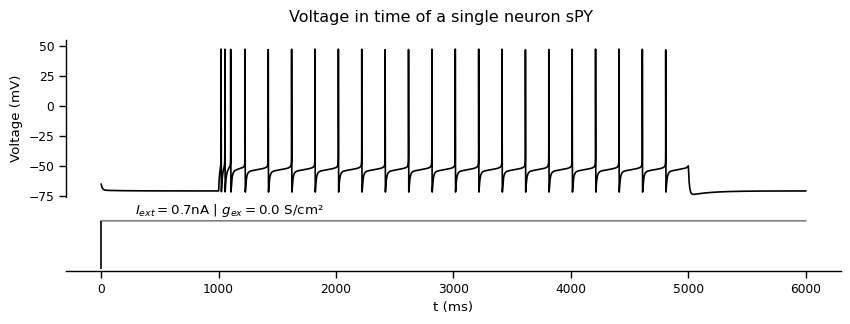

In [4]:
plotPotential(single_neuron,save=True)

# Fire rate / current external

In [5]:
rates, currents, CV, v_soma = [], [], {}, {}

for batch_number in range(1,26):
    batch_number = str(batch_number).zfill(4)

    for current in range(4):
        with open(f'../data1/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_data.pkl', 'rb') as f:
            data = pickle.load(f)
        amp = data['simConfig']['IClamp0']['amp']
        time = data['simData']['t']
        currents.append(amp)
        v_soma[amp] = data['simData']['V_soma']['cell_0']


        with open(f'../data1/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_rate.json', 'rb') as f:
            rate = json.load(f)
        rates.append(np.mean(rate['statData']))

        with open(f'../data1/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_CV.json', 'rb') as f:
            cv = json.load(f)
        CV[amp] = np.mean(cv['statData'])

for batch_number in range(1,26):
    batch_number = str(batch_number).zfill(4)

    for current in range(4):
        with open(f'../data1/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_data.pkl', 'rb') as f:
            data = pickle.load(f)
        amp = data['simConfig']['IClamp0']['amp']
        currents.append(amp)
        v_soma[amp] = data['simData']['V_soma']['cell_0']

        with open(f'../data1/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_rate.json', 'rb') as f:
            rate = json.load(f)
        rates.append(np.mean(rate['statData']))

        with open(f'../data1/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_CV.json', 'rb') as f:
            cv = json.load(f)
        CV[amp] = np.mean(cv['statData'])

In [6]:
for i in range(38,50):
    print(f'({currents[i]:.3f} nA, {rates[i]:.3f} Hz)')

(0.480 nA, 0.000 Hz)
(0.490 nA, 0.000 Hz)
(0.500 nA, 0.167 Hz)
(0.510 nA, 0.167 Hz)
(0.520 nA, 0.167 Hz)
(0.530 nA, 0.167 Hz)
(0.540 nA, 0.167 Hz)
(0.550 nA, 0.167 Hz)
(0.560 nA, 0.167 Hz)
(0.570 nA, 0.167 Hz)
(0.580 nA, 0.333 Hz)
(0.590 nA, 0.333 Hz)


Note que ocorre disparos a partir de $0.490nA$.

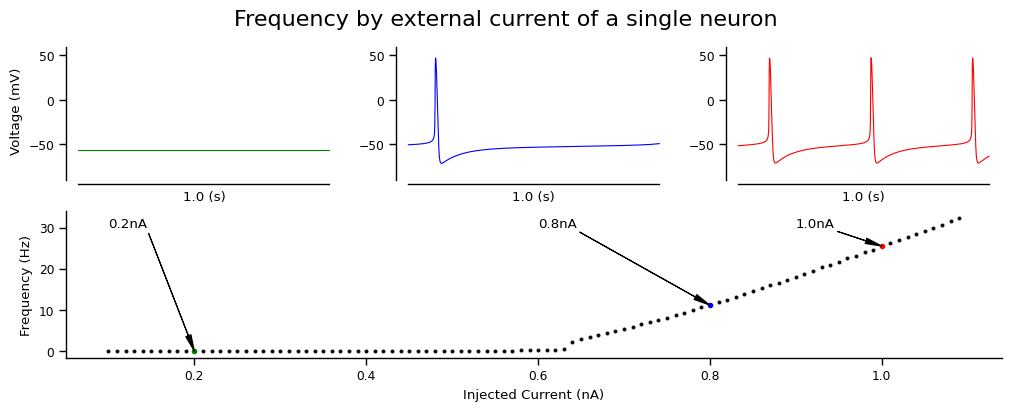

In [10]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout="constrained", figsize=(10,4))
title = 'Frequency by external current of a single neuron'
fig.suptitle(title)
gs = GridSpec(2, 3, figure=fig,) #height_ratios=)

# voltage plot
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax = [ax0,ax1,ax2]
#sns.lineplot(x = time[-1000:], y = v_soma[0.02][-1000:], color='green', ax=ax0, linewidth=2)

amps = [0.5, 0.8, 1]
color = ['green','blue','red']
ax0.set_ylabel('Voltage (mV)')

for i, axis in enumerate(ax):
    t_trans = 1000
    t = np.array(time[-t_trans:])
    v = np.array(v_soma[amps[i]][-t_trans:])
    sns.lineplot(x = t, y = v, color=color[i], ax=axis, linewidth=0.8)

    axis.set_ylim(-95, 70)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_xlabel(f'{t_trans/10**3} (s)')
    axis.set_xticklabels(['','',''])
    axis.set_xticks([], major=True)

    axis.spines.bottom.set_bounds(t.min(), t.max())
    axis.spines.left.set_bounds(-90, 60)
    

# frequency/current plot
ax5 = fig.add_subplot(gs[1, :])
#ax5.set_ylim(-90, 50)
#sns.lineplot(x = time[-100:], y = v_soma[0.02][-100:], color='green', ax=ax5, linewidth=2)
arrowprops = dict(facecolor='black', width=0.009 , headwidth=4)
#delta = 5

sns.scatterplot(x = currents, y = rates, color='black', s=8, ax=ax5)

ax5.scatter(x = currents[10:11], y=rates[10:11], color='green', s=10)
ax5.annotate(f'{currents[10]}nA', xy=(currents[10], rates[10]), xytext=(0.1, 30), arrowprops=arrowprops)

ax5.scatter(x = currents[70:71], y=rates[70:71], color='blue', s=10)
ax5.annotate(f'{currents[70]}nA', xy=(currents[70], rates[70]), xytext=(0.60, 30), arrowprops=arrowprops)

ax5.scatter(x = currents[90:91], y=rates[90:91], color='red', s=10)
ax5.annotate(f'{currents[90]}nA', xy=(currents[90], rates[90]), xytext=(0.90, 30), arrowprops=arrowprops)


ax5.set_ylabel('Frequency (Hz)')
ax5.set_xlabel('Injected Current (nA)')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

fig.suptitle(title, fontsize=16)
#format_axes(fig)

path_figures = '../figures/'
fname = title.replace(' ','_')
plt.savefig(path_figures + fname + '.png')

plt.show()

# Analyse raster plot

In [ ]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set_context('paper')

datas = {}
for batch in range(1,7):
    batch = str(batch).zfill(4)
    for current in range(4):
        try:
            with open(f'../data2/v2_batch{batch}/v2_batch{batch}_0_{current}_data.pkl', 'rb') as f:
                data = pickle.load(f)
            gex = data['simConfig']['gex']
            amp = data['simConfig']['IClamp0']['amp']
            datas[f'{amp}_{gex}'] = data
        except:
            print(f'Error: to read {batch}_{current}')
            pass

        try:
            with open(f'../data2/v2_batch{batch}/v2_batch{batch}_0_{current}_CV.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['CV'] = data
        except:
            print(f'Error: to read CV {batch}_{current}')
            pass

        try:
            with open(f'../data2/v2_batch{batch}/v2_batch{batch}_0_{current}_rate.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['rate'] = data
        except:
            print(f'Error: to read rate {batch}_{current}')
            pass

        try:
            with open(f'../data2/v2_batch{batch}/v2_batch{batch}_0_{current}_sync.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['sync'] = data
        except:
            print(f'Error: to read rate {batch}_{current}')
            pass

def get_numpy(data):
    mapa = np.zeros((100, len(data['simData']['t'])))
    for i, value in enumerate(data['simData']['V_soma'].values()):
        mapa[i] = value
    return mapa

In [ ]:
def plotRaster(data, ti=3000, tf=None):
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    popRates = data['simData']['popRates']['sPY']
    #sync = data['sync']['statData'][0][0]
    #cv_bar = np.mean(data['CV']['statData'])

    spkid = np.array(data['simData']['spkid'])
    spkt = np.array(data['simData']['spkt'])

    if tf == None:
        tf = spkt[-1]

    fig, ax = plt.subplots(1,1, figsize=(10,2))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('$n$-th neuron')
    ax.set_xlabel('t (ms)')

    label_gex = f'{gex}'+'S/cm²'
    parameters = r'g_{ex}' + f'={label_gex}' + '\quad' + r'i_{ex}' + f'={amp}nA'+ '\quad'+ 'PopRate'+f'={popRates:.2f}Hz'

    ax.set_title('Raster Plot \n$'+parameters+'$', pad=20)
    if amp in [0.21, 0.22, 0.23]:
        for i in np.arange(20,60,0.1):
            plt.hlines(i, 3000, spkt[-1], alpha=0.02, color='orange')
    sns.scatterplot(y = spkid, x = spkt, s=0.5, color='black', ax=ax)
    plt.xlim(ti, tf)
    plt.ylim(0,100)
    plt.show()

for data in datas.values():
    plotRaster(data)


```python
spkid = np.array(datas['0.3_0.0001']['simData']['spkid'][-5000:])
spkt = np.array(datas['0.3_0.0001']['simData']['spkt'][-5000:])

print(f'Spike time: min={spkt.min()} max={spkt.max()}')
print(spkt.shape)

plt.figure()
sns.scatterplot(y = spkid, x = spkt, s=0.8)
plt.show()

teste = pd.DataFrame({}, index = np.arange(spkt.min()-1,6001, dtype=np.float64))

for idx_spkt, t in enumerate(spkt):
    if t in teste.index:
        teste.loc[t,int(spkid[idx_spkt])] = 1
    else:
        teste.loc[t,int(spkid[idx_spkt])] = 0

teste = teste.fillna(0)
```

# plot potential with heatmap

In [ ]:
def plotPotentialTime(data, figsize=(10,5), ti=-4000, tf = -1):
    mapa = get_numpy(data)
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    t = data['simConfig']['duration']
    fig, ax = plt.subplots(figsize = figsize)
    heatmap = sns.heatmap(mapa[:,ti:], cmap='rainbow', ax=ax,
                        cbar_kws={'label': 'Membrane potential $(mV)$'})

    heatmap.set(xlim = (0,-1*ti))
    xlabels = t - heatmap.get_xticks()
    xlabels = ['{:,.2f}'.format(x) if i%2!=0 else '' for i, x in enumerate(xlabels/1000)]
    xlabels = xlabels[::-1]
    heatmap.set_xticklabels(xlabels)

    plt.xticks(rotation=30)
    label_gex = f'{gex}'+' S/cm^{2}'
    plt.title(f'Potential in time, network parameters:\n gex = ${label_gex}$ | amp = {amp} nA', pad=20, fontsize=14)
    plt.ylabel('$n$-th neuron')
    plt.xlabel('time ($s$)')
    plt.show()

In [ ]:
plotPotentialTime(datas['0.2_0.0001'])

# Plot potential

In [ ]:
for key, data in datas.items():
    plotPotential(data)

# Aplicar diagnosticos



$$Z_j(t) = \Big| \frac{1}{2\delta + 1} \sum_{|j-k| \le \delta} e^{i\theta_k(t)}\Big|$$


I need to tweak the code to get the phase as a function of the spike time


$$\theta_k(t) = 2\pi m + \frac{t- t_{k,m}}{t_{k, m+1} - t_{k,m}}$$






In [ ]:
def param_local_order(spatial_pattern, n_neighbors):
    spatial_pattern = np.array(spatial_pattern)
    n = len(spatial_pattern)
    n_neighbors = int(n_neighbors/2)
    # e^{i(theta_k)} = cos(theta_k) + i sin(theta_k)
    real = np.zeros_like(spatial_pattern, dtype='g') 
    complx = np.zeros_like(spatial_pattern, dtype='g')
    Zk = np.zeros_like(spatial_pattern, dtype='g')

    for i in range(n):
        for k in range(-n_neighbors, n_neighbors+1):
            if i!=(k+i): # not autoconection
                real[i%n] += np.cos(2*np.pi*spatial_pattern[(k+i)%n]) # real part
                complx[i%n] += np.sin(2*np.pi*spatial_pattern[(k+i)%n]) # img part       
        Zk[i%n] += real[(i)%n]*real[(i)%n] + complx[(i)%n]*complx[(i)%n] # 
        Zk[i%n] = abs((1.0/(2*n_neighbors))*np.sqrt(Zk[i%n])) # len fasor.

    return Zk

In [ ]:
mapa = np.zeros((100, len(datas['0.2_0.0001']['simData']['t'])))

for i in range(100):
    mapa[i,:] = datas['0.2_0.0001']['simData']['V_soma'][f'cell_{i}']

In [ ]:
zk_4 = param_local_order(mapa[:,-4000], datas['0.2_0.0001']['simConfig']['n_neighbors'])
zk_5 = param_local_order(mapa[:,-5000], datas['0.2_0.0001']['simConfig']['n_neighbors'])

In [ ]:
for key in datas.keys():
    mapa = get_numpy(datas[key])
    zk = param_local_order(mapa, datas[key]['simConfig']['n_neighbors'])
    datas[key]['zk'] = zk

In [ ]:
def plot_zk(data, figsize=(8,2), ti=-4000, tf = -1):
    mapa = get_numpy(data)
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    t = data['simConfig']['duration']
    
    fig, ax = plt.subplots(figsize = figsize)
    heatmap = sns.heatmap(data['zk'][:,ti:tf], cmap='gnuplot', ax=ax,
                        cbar_kws={'label': '$Z_i$'}, vmin=0, vmax=1)
    
    heatmap.set(xlim = (0,-1*ti))
    xlabels = t - heatmap.get_xticks()
    xlabels = ['{:,.2f}'.format(x) if i%2!=0 else '' for i, x in enumerate(xlabels/1000)]
    xlabels = xlabels[::-1]
    heatmap.set_xticklabels(xlabels)

    plt.xticks(rotation=30)
    label_gex = f'{gex}'+' S/cm^{2}'
    plt.title(f'Param local order, network parameters:\n gex = ${label_gex}$ | amp = {amp}', pad=20, fontsize=14)
    plt.ylabel('$n$-th neuron')
    plt.xlabel('time ($s$)')

    
    plt.show()
    

In [ ]:
plot_zk(datas['0.09_0.0001'], figsize=(8,2), ti=-3900)
plotPotentialTime(datas['0.09_0.0001'], figsize=(8,2), ti=-3900)

In [ ]:
plot_zk(datas['0.11_0.0001'], figsize=(8,2), ti=-3900)
plotPotentialTime(datas['0.11_0.0001'], figsize=(8,2), ti=-3900)

In [ ]:
plot_zk(datas['0.2_0.0001'], figsize=(8,2), ti=-3900)
plotPotentialTime(datas['0.2_0.0001'], figsize=(8,2), ti=-3900)

# Recurrence Analysis of CV

In [ ]:
statData = []

spkinds = datas['0.09_0.0001']['simData']['spkid']
spkts = datas['0.09_0.0001']['simData']['spkt']

spkmat = [[spkt for spkind, spkt in zip(spkinds, spkts) if spkind == gid] for gid in set(range(100))]
isimat = [[t - s for s, t in zip(spks, spks[1:])] for spks in spkmat if len(spks) > 10]
# interspike interval
isicv = [np.std(x) / np.mean(x) if len(x) > 0 else 0 for x in isimat]  # if len(x)>0]
statData.append(isicv)

In [ ]:
isicv = np.array(isicv)

In [ ]:
from pyunicorn.timeseries import RecurrencePlot

#  Settings for the embedding
DIM = 1  # Embedding dimension
TAU = 0  # Embedding delay

# Distance metric in phase space ->
# Possible choices ("manhattan","euclidean","supremum")
METRIC = 'euclidean'

EPS = 0.1  # Fixed recurrence threshold

rp_4 = RecurrencePlot(isicv, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,3), sharex=True, sharey=True)

ax.matshow(rp_4.recurrence_matrix(), cmap='binary', aspect='auto')

ax.set_xlabel(r'$CV_i$')
ax.set_ylabel(r'$CV_j$')
plt.show()

In [ ]:
mapa = get_numpy(datas['0.3_0.0001'])

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4), sharey=True)
sns.scatterplot(mapa[:,4000], ax=ax[0], color='red')
sns.lineplot(mapa[:,4000], ax=ax[0], color='black', linewidth=0.5)

sns.scatterplot(mapa[:,5000], ax=ax[1], color='red')
sns.lineplot(mapa[:,5000], ax=ax[1], color='black', linewidth=0.5)

ax[0].set_ylabel('Membrane Potential ($mV$)')
ax[0].set_xlabel('$n$-th Neuron')
ax[1].set_xlabel('$n$-th Neuron')

plt.show()

In [ ]:
zk_4 = param_local_order(mapa[:,-4000], datas['0.2_0.0001']['simConfig']['n_neighbors'])
zk_5 = param_local_order(mapa[:,-5000], datas['0.2_0.0001']['simConfig']['n_neighbors'])

In [ ]:
from pyunicorn.timeseries import RecurrencePlot

#  Settings for the embedding
DIM = 1  # Embedding dimension
TAU = 0  # Embedding delay

# Distance metric in phase space ->
# Possible choices ("manhattan","euclidean","supremum")
METRIC = 'euclidean'

EPS = 0.15  # Fixed recurrence threshold

rp_4 = RecurrencePlot(zk_4, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

rp_5 = RecurrencePlot(zk_5, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3), sharex=True, sharey=True)

ax[0].matshow(rp_4.recurrence_matrix(), cmap='binary', aspect='auto')
ax[1].matshow(rp_5.recurrence_matrix(), cmap='binary', aspect='auto')

ax[0].set_xlabel(r'$\theta_i$')
ax[1].set_xlabel(r'$\theta_i$')
ax[0].set_ylabel(r'$\theta_i$')
plt.show()

# Analysis data3

In [ ]:
import pickle
import json

def get_infos_batch(path_data:str, version:int, bactch_number:int, sub_batch_number:int, verbose=False):
    """
    Retrieves various information from pickle and JSON files based on the provided version, batch number, and sub-batch number.

    Args:
        path_data (str): Path of folder that contains the data.
        version (int): The version number.
        bactch_number (int): The batch number.
        sub_batch_number (int): The sub-batch number.

    Returns:
        dict: A dictionary containing the following information:
            - 'path_file' (str): The path of the data file.
            - 'gex' (float): Value obtained from the 'simConfig' dictionary in the pickle file.
            - 'amp' (float): Value obtained from the 'IClamp0' dictionary in the pickle file.
            - 'cv' (dict): Data obtained from the 'statData' dictionary in the CV JSON file.
            - 'rate' (dict): Data obtained from the 'statData' dictionary in the rate JSON file.
            - 'sync' (dict): Data obtained from the 'statData' dictionary in the sync JSON file.

    Raises:
        Exception: If an error occurs while opening any of the required files.

    """
    bactch_number = str(bactch_number).zfill(4)
    path_files = f'../{path_data}/v{version}_batch{bactch_number}/v{version}_batch{bactch_number}_0_{sub_batch_number}'

    infos = {}
    infos['path_file'] = path_files
    try:
        with open(path_files+'_data.pkl', 'rb') as f:
            data = pickle.load(f)
            gex = data['simConfig']['gex']
            amp = data['simConfig']['IClamp0']['amp']

            infos['gex'] = gex
            infos['amp'] = amp
    except:
        if verbose: print('Error to open: ' + path_files + '_data.pkl')
        return None
    
    try:
        with open(path_files+'_CV.json', 'rb') as f:
            data = json.load(f)
            cv = data['statData']
            infos['cv'] = cv
    except:
        if verbose: print('Error to open: ' + path_files + '_CV.json')
        return None
        
    try:
        with open(path_files+'_rate.json', 'rb') as f:
            data = json.load(f)
            rate = data['statData']
            infos['rate'] = rate
    except:
        if verbose: print('Error to open: ' + path_files + '_rate.json')
        return None
    
    try:
        with open(path_files+'_sync.json', 'rb') as f:
            data = json.load(f)
            sync = data['statData']
            infos['sync'] = sync
    except:
        if verbose: print('Error to open: ' + path_files + '_sync.json')
        return None
    
    return infos   

def load_batch_data(path_data: str, version: int, batch: int, sub_batch: int) -> dict:
    """
    Loads batch data from a pickle file based on the provided path, version, batch number, and sub-batch number.

    Args:
        path_data (str): The path to the data folder.
        version (int): The version number.
        batch (int): The batch number.
        sub_batch (int): The sub-batch number.

    Returns:
        dict: The loaded data from the pickle file.

    Raises:
        Exception: If an error occurs while reading the pickle file.

    """
    batch_number = str(batch).zfill(4)
    path_files = f'../{path_data}/v{version}_batch{batch_number}/v{version}_batch{batch_number}_0_{sub_batch}'

    try:
        with open(path_files + '_data.pkl', 'rb') as f:
            data = pickle.load(f)
            return data
    except:
        raise Exception(f'Error reading: {path_files}')


In [ ]:
batches = {}
for batch in range(1,69):
    for sub_batch in range(5):
        infos = get_infos_batch('data3', 3,batch,sub_batch)
        if infos!= None: batches[f'{batch}_{sub_batch}'] = infos    

In [ ]:
batches.keys()

In [ ]:
batch_1_1 = load_batch_data('data3', 3, 1, 1)
batch_2_1 = load_batch_data('data3', 3, 2, 1)
batch_4_1 = load_batch_data('data3', 3, 4, 1)
plotRaster(batch_1_1, ti=5000)
plotRaster(batch_2_1, ti=5000)
plotRaster(batch_4_1, ti=5000)
#plotPotential(batch_10_1, ti = -10000, tf = -1, cell=50)

In [ ]:
batchs = [batch_1_1, batch_2_1, batch_4_1]

fig, ax = plt.subplots(ncols=1,nrows=3, figsize=(12,8))
title = 'Raster plot of HH non-local networks with diferent external currents'
fig.suptitle(title)
fig.tight_layout(pad=5)
ti, tf = 5000, None

for i, batch in enumerate(batchs):
    gex = batch['simConfig']['gex']
    amp = batch['simConfig']['IClamp0']['amp']
    popRates = batch['simData']['popRates']['sPY']

    spkid = np.array(batch['simData']['spkid'])
    spkt = np.array(batch['simData']['spkt'])

    tf = spkt[-1]

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    ax[i].set_title('$'+parameters+'$', pad=20, loc='left')
    ax[i].set_ylabel('$n$-th neuron')
    if i==2: ax[i].set_xlabel('t (ms)')

    label_gex = f'{gex}'+'S/cm²'
    parameters = r'g_{ex}' + f'={label_gex}' + '\quad' + r'i_{ex}' + f'={amp}nA'+ '\quad'+ 'PopRate'+f'={popRates:.2f}Hz'

    sns.scatterplot(y = spkid, x = spkt, s=0.9, color='black', ax=ax[i])
    ax[i].set_xlim(ti, tf)
    ax[i].set_ylim(0,100)
#plt.savefig('../figures/'+title.replace(' ','_')+'.eps')
#plt.savefig('../figures/'+title.replace(' ','_')+'.png')
plt.show()


In [ ]:
from pyunicorn.timeseries import RecurrencePlot

def get_rp(array, eps = 0.01): 
    array = np.array(array)   
    #  Settings for the embedding
    DIM = 1  # Embedding dimension
    TAU = 0  # Embedding delay

    # Distance metric in phase space ->
    # Possible choices ("manhattan","euclidean","supremum")
    METRIC = 'euclidean'

    EPS = eps  # Fixed recurrence threshold

    rp = RecurrencePlot(array, dim=DIM, tau=TAU, metric=METRIC,
                        normalize=False, threshold=EPS)
    return rp


def get_recurrence_matrix(array, eps=0.01):
    array = get_rp(array, eps).recurrence_matrix()
    return array

In [ ]:
def plot_recurrence_matrix(array, eps=0.01):
    recmat = get_recurrence_matrix(array, eps)
    evals, evecs = np.linalg.eigh(recmat)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
    sns.heatmap(recmat, cmap = 'binary', ax=ax[0])
    plt.show()


In [ ]:
mbrn_pot_11 = get_numpy(batch_1_1)
mbrn_pot_21 = get_numpy(batch_2_1)
mbrn_pot_41 = get_numpy(batch_4_1)

In [ ]:
plotPotential(batch_4_1, ti=-20, cell=50)
plotPotential(batch_4_1, ti=-20, cell=40)
plotPotential(batch_4_1, ti=-20, cell=45)